In [53]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Optimized Data

after couple of expiriments the dataset was optimized when unimportant features (in manner of variant and contributions for prediction scores) been removed

In [54]:
# set constants
target_label = 'tuple'
path = "/content/drive/MyDrive/Colab Notebooks/MasterResearch/Tenserflow_NN_Classification/" # "../Datasets/" + target_label + "_dataset/"
optimized_data_file = "new_all_features_"

In [55]:
data = pd.read_csv(path+optimized_data_file+target_label+'_train.csv',
                      sep='\t',
                      skiprows=[1])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442 entries, 0 to 14441
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fSSL_session_id_len  14442 non-null  int64  
 1   fSSL_num_extensions  14442 non-null  int64  
 2   SYN_tcp_scale        14442 non-null  int64  
 3   SYN_tcp_winsize      14442 non-null  int64  
 4   size_histogram_1     14442 non-null  int64  
 5   size_histogram_2     14442 non-null  int64  
 6   size_histogram_3     14442 non-null  int64  
 7   size_histogram_4     14442 non-null  int64  
 8   size_histogram_5     14442 non-null  int64  
 9   size_histogram_6     14442 non-null  int64  
 10  size_histogram_7     14442 non-null  int64  
 11  size_histogram_8     14442 non-null  int64  
 12  size_histogram_9     14442 non-null  int64  
 13  size_histogram_10    14442 non-null  int64  
 14  fpeak_features_1     14442 non-null  float64
 15  fpeak_features_2     14442 non-null 

In [57]:
data.shape

(14442, 60)

In [58]:
y_train = data[target_label]
x_train = data.drop(columns=[target_label])

In [59]:
y_train.unique()

array([16102, 14602, 15602, 18102, 13102, 11602, 16201, 13201, 18201, 16101, 13101, 18101, 16202, 18202, 13202, 16302, 18302, 13302, 13403, 18403, 17403, 14601, 17101, 12101, 17201, 12201, 16403,
       16103, 13103, 18103])

In [60]:
x_train.head()
# x_train.tail()
# those will be the same as above...

,fSSL_session_id_len,fSSL_num_extensions,SYN_tcp_scale,SYN_tcp_winsize,size_histogram_1,size_histogram_2,size_histogram_3,size_histogram_4,size_histogram_5,size_histogram_6,...,max_fpkt,max_bpkt,std_fpkt,std_bpkt,mean_fpkt,mean_bpkt,num_keep_alive,ssl_v,fcipher_suites,mean_fttl
0,0,11,8,8192,39,4,1,2,0,0,...,446,1414,79.6,567.1,77.2,1069.3,3,2,3,2
1,32,12,8,8192,56,2,2,2,0,0,...,571,1414,121.2,432.1,90.1,1248.1,0,2,3,2
2,0,11,8,8192,63,6,1,0,2,0,...,745,1414,120.9,324.5,92.5,185.5,19,2,3,2
3,32,13,8,8192,33,3,1,2,0,0,...,571,1414,123.3,556.3,92.9,1095.8,3,2,2,2
4,0,11,8,8192,4327,3975,21,108,57,1,...,2944,1414,727.3,294.2,351.5,259.7,1,2,3,2


# Read Unseen Test

In [61]:
unseen_data = pd.read_csv(path+optimized_data_file+target_label+'_test.csv',
                      sep='\t',
                      skiprows=[1])

In [62]:
unseen_data.shape

(6189, 60)

In [63]:
# saving the target column
y_test = unseen_data[target_label]
x_test = unseen_data.drop(columns=[target_label])

In [64]:
y_test.unique()

array([16102, 14602, 15602, 18102, 13102, 11602, 16201, 13201, 18201, 16101, 13101, 18101, 16202, 18202, 13202, 16302, 18302, 13302, 13403, 18403, 17403, 14601, 17101, 12101, 17201, 12201, 16403,
       16103, 13103, 18103])

In [65]:
x_test.head()
# data.tail()
# those will be the same as above...

,fSSL_session_id_len,fSSL_num_extensions,SYN_tcp_scale,SYN_tcp_winsize,size_histogram_1,size_histogram_2,size_histogram_3,size_histogram_4,size_histogram_5,size_histogram_6,...,max_fpkt,max_bpkt,std_fpkt,std_bpkt,mean_fpkt,mean_bpkt,num_keep_alive,ssl_v,fcipher_suites,mean_fttl
0,0,12,8,8192,67,5,3,3,0,0,...,473,1414,87.6,473.9,93.4,1191.5,3,2,2,2
1,32,13,8,8192,8853,108,447,418,48,52,...,571,1414,79.0,355.1,71.5,1291.5,7,2,2,2
2,32,13,8,8192,1753,7,1,6,5,2,...,746,1414,39.2,106.9,65.5,1404.3,0,2,2,2
3,32,13,8,8192,3043,67,147,145,19,17,...,571,1414,76.7,354.9,70.9,1291.6,4,2,2,2
4,32,13,8,8192,32,3,2,2,0,0,...,571,1414,125.5,598.9,94.4,1008.1,4,2,2,2


#### Normalize feature values

In [66]:
# TBD
# MAX_VALUE = ??
# x_train_normalized = x_train / MAX_VALUE
# x_test_normalized = x_test / MAX_VALUE
print((y_test+y_train).unique())
print(len((y_test+y_train).unique()))


# Create a dictionary that maps each label to its corresponding index.
label_to_index = {label: index for index, label in enumerate(set(y_train))}

# Iterate over the values in y_test and y_train and replace each label with its corresponding index.
for i in range(len(y_test)):
  y_test[i] = label_to_index[y_test[i]]

for i in range(len(y_train)):
  y_train[i] = label_to_index[y_train[i]]

print((y_test+y_train).unique())
print(len((y_test+y_train).unique()))


[32204. 30704. 31704. 34204. 29204. 27704. 26204. 30803. 27803. 28803. 33803. 36303. 34203. 29203. 26203. 31203. 29703. 27804. 32403. 34403. 29403. 32503. 29503. 34503. 36503. 31503. 31604. 29504.
 34504. 31504. 30504. 27702. 32702. 35202. 30202. 35302. 30302. 31204. 36204.    nan]
40


<ipython-input-66-28914b4dda60>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[i] = label_to_index[y_test[i]]
<ipython-input-66-28914b4dda60>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[i] = label_to_index[y_train[i]]


[48. 25. 50. 38. 33. 10. 21. 18.  3. 28. 31. 19. 37. 32. 17. 22. 35. 23. 20. 27. 12. 15. 34. 26. 44. 45. 30. 36.  8. 13. 29. 24. nan]
33


## Define a plotting function

The following function plots an accuracy curve:

In [67]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


# Defining Model Creation Function

In [73]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""

  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array.
  # Flatten that two-dimensional array into a one-dimensional
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(59, )))

#   # Define the first hidden layer.
#   model.add(tf.keras.layers.Dense(units=59*2, activation='relu'))

#   # Define the first hidden layer.
#   model.add(tf.keras.layers.Dense(units=59*3, activation='relu'))

# # Define the first hidden layer.
#   model.add(tf.keras.layers.Dense(units=59*2, activation='relu'))

# Define the first hidden layer.
  model.add(tf.keras.layers.Dense(units=59, activation='relu'))

  # Define a dropout regularization layer.
  model.add(tf.keras.layers.Dropout(rate=0.3))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=40, activation='softmax'))

  # Construct the layers into a model that TensorFlow can execute.
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model

# Defining Model Training Function

In [74]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

# Setup DNN Model

Epoch 1/50
337/337 [==============================] - 2s 3ms/step - loss: 105199.6797 - accuracy: 0.3501 - val_loss: 95668.8516 - val_accuracy: 0.3351
Epoch 2/50
337/337 [==============================] - 1s 3ms/step - loss: 25433.9707 - accuracy: 0.2136 - val_loss: 44612.5820 - val_accuracy: 0.0148
Epoch 3/50
337/337 [==============================] - 1s 3ms/step - loss: 7659.9141 - accuracy: 0.2497 - val_loss: 17603.9121 - val_accuracy: 0.4759
Epoch 4/50
337/337 [==============================] - 1s 4ms/step - loss: 67521.2188 - accuracy: 0.2633 - val_loss: 11868.0371 - val_accuracy: 0.4787
Epoch 5/50
337/337 [==============================] - 1s 4ms/step - loss: 1854.3771 - accuracy: 0.2638 - val_loss: 10981.4736 - val_accuracy: 0.4784
Epoch 6/50
337/337 [==============================] - 1s 4ms/step - loss: 2515.8354 - accuracy: 0.2632 - val_loss: 10378.5947 - val_accuracy: 0.4787
Epoch 7/50
337/337 [==============================] - 2s 5ms/step - loss: 1576.7914 - accuracy: 0.2617

[1834.813232421875, 0.32444658875465393]

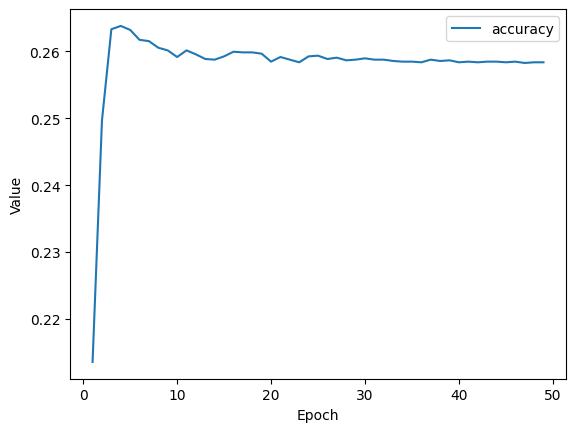

In [78]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 30
validation_split = 0.3

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train.to_numpy(), y_train.to_numpy(),
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test.to_numpy(), y=y_test.to_numpy(), batch_size=batch_size)

In [ ]:
# learning_rate = 0.003
# epochs = 50
# batch_size = 30
# validation_split = 0.3
# accuracy: 0.3244

# learning_rate = 0.003
# epochs = 50
# batch_size = 5
# validation_split = 0.3
# accuracy: 0.3244

# learning_rate = 0.0001
# epochs = 50
# batch_size = 5
# validation_split = 0.3
# accuracy: 0.3262